In [1]:
using Revise
using SSMCMain, SSMCMain.ModifiedMiCRM, MLSolver

Precompiling packages...
  11204.4 ms  ✓ SSMCMain
  1 dependency successfully precompiled in 13 seconds. 472 already precompiled.


In [2]:
using CairoMakie, ProgressLogging

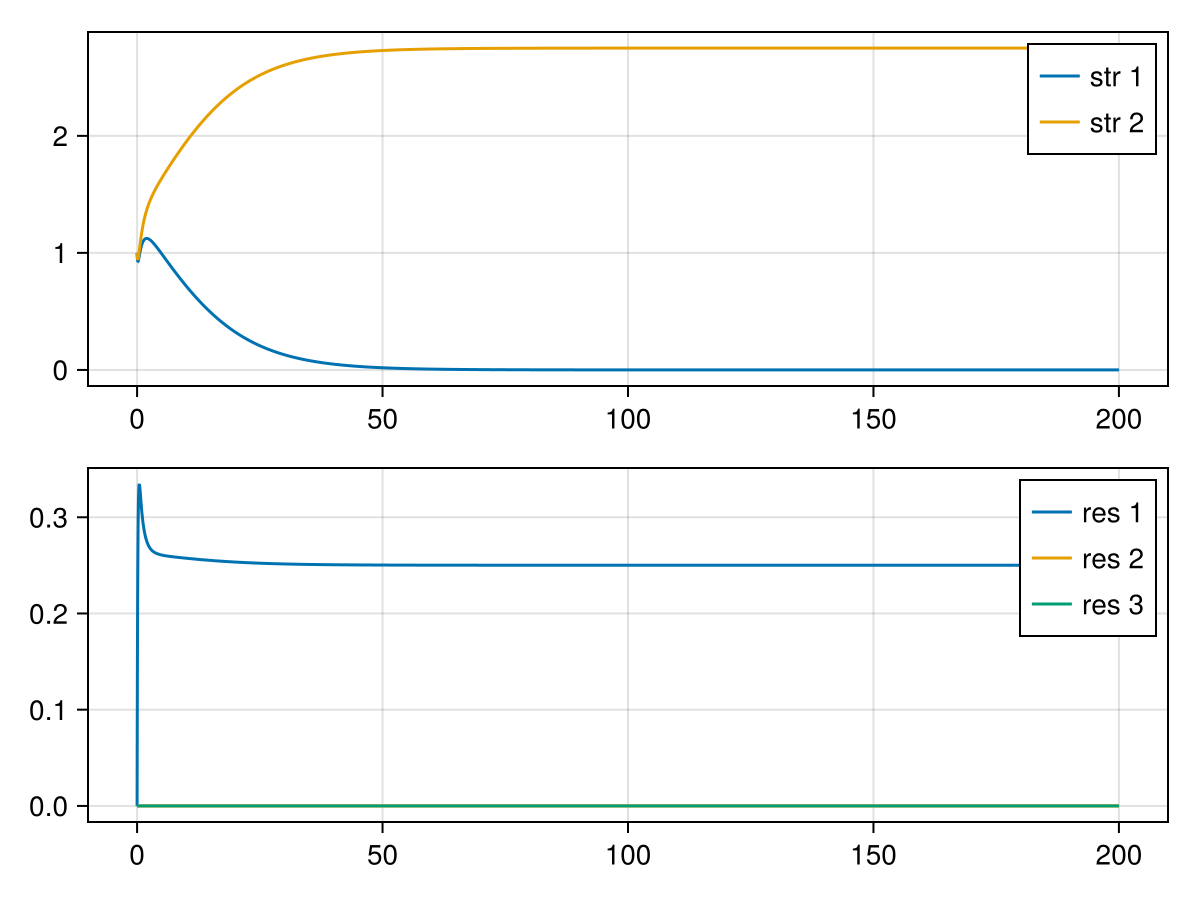

[5.668028685659749e-9, 2.7499377131246723, 0.2500622805775025, 0.0, 0.0]

In [3]:
D = fill(0., 2, 3, 3)
D[1,:,:] .= [0. 0. 0.; 0. 0. 0.; 1 0. 0.]
D[2,:,:] .= [0. 0. 0.; 1. 0. 0.; 0. 0. 0.]
p, s = make_solve_plot_return(2,3,200;
    D=SArray{Tuple{2,3,3}}(D),
    K=[3., 0., 0.],
    r=[1., 0.2, 0.2],
    l=[0. 0. 0.; 0. 0. 0.],
    c=[4. 2. 0.; 4. 0. 2.],
    m=[1.1, 1.],
    u0=[1., 1., 0., 0., 0.],
    u0rand=0.
)
# display(p.p.c)
# display(p.p.D[1,:,:])
# display(p.p.D[2,:,:])
show(s.u[end])
# param_summary(p.p)

In [4]:
symsol = symbolic_solve_ode_ml(p)

┌ Warning: Solve::ratnz: Solve was unable to solve the system with inexact coefficients.
│     The answer was obtained by solving a corresponding exact system and
│     numericizing the result.
└ @ MathLink ~/.julia/packages/MathLink/S39uA/src/eval.jl:16


8-element Vector{Vector{Pair{Symbolics.Num, Symbolics.Num}}}:
 [u1 => -0.1, u2 => 2.85, u3 => 0.25, u4 => 0.05, u5 => 0.0]
 [u1 => 0.0, u2 => 2.75, u3 => 0.25, u4 => 0.0, u5 => 0.0]
 [u1 => 2.577272727272727, u2 => -0.1, u3 => 0.275, u4 => 0.0, u5 => -0.05]
 [u1 => 2.477272727272727, u2 => 0.0, u3 => 0.275, u4 => 0.0, u5 => 0.0]
 [u1 => 0.0, u2 => 0.0, u3 => 3.0, u4 => 0.0, u5 => 0.0]
 [u1 => -0.1, u2 => 0.0, u3 => 5.0, u4 => -9.45, u5 => 0.0]
 [u1 => 0.0, u2 => -0.1, u3 => 5.0, u4 => 0.0, u5 => -9.5]
 [u1 => -0.1, u2 => -0.1, u3 => 15.0, u4 => -29.45, u5 => -29.5]

In [5]:
sssol = solve(SteadyStateProblem(p), SSRootfind(GaussNewton()); abstol=1e-18);
show(sssol)

[2.477272727272727, -3.969093691190724e-24, 0.275, 0.0, 0.0]

In [16]:
ks = LinRange(0., 10., 10000)
Ds = [0.01, 0.01, 1e4, 1., 1.]
usol = s.u[end]
#usol = sssol.u
#usol = Symbolics.value.(getindex.(symsol[2], 2))
show(uninplace(mmicrmfunc!)(sssol.u, p.p, 0))

[0.0, -3.9690936911907275e-25, 0.0, 0.0, 0.0]

maximum(real(lambdas)) = -0.006372886048431853


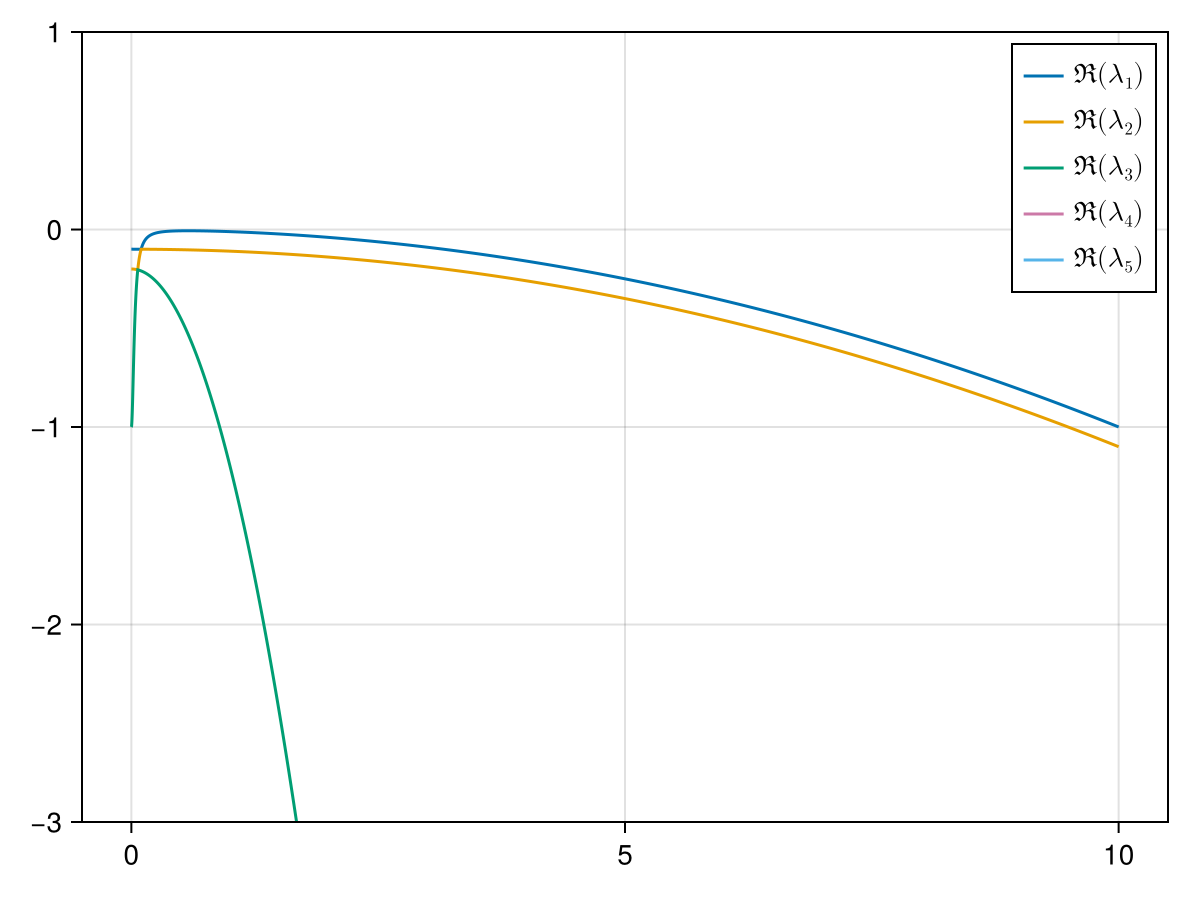

In [17]:
lambdas = do_linstab_for_ks(ks, p, Ds, usol);
@show maximum(real(lambdas))
faa = plot_linstab_lambdas(ks, lambdas[:,:])
ylims!(faa.axis, (-3., 1.))
#xlims!(faa.axis, (0., 2.))
faa

In [8]:
ff = linstab_make_full_func(p.p, usol, Ds)
kmax_i = argmax(maximum.(eachrow(real(lambdas))))
kmax = ks[kmax_i]
kmax_i, kmax

(1, 0.0)

In [9]:
kmax_es = ff(kmax);
kmax_es.vectors[:,1]

5-element Vector{Float64}:
 -0.672322322519906
  0.7402274378303019
 -0.006784904172219177
  0.0
  0.0